In [10]:
from __future__ import division
import numpy as np
import scipy.special

def ncdf(z):
    return 0.5 * (1 + scipy.special.erf(z/2**0.5))

def p_correct_snr(M, N=10000, D=27, ares=2000):
    M = np.array(M)
    p = np.zeros((ares-1, len(M)))

    for iM,Mval in enumerate(M):
        
        snr = (N / Mval)**0.5
        # span the Hit distribution up to 8 standard deviations @todo: make parameter
        avals = np.linspace(snr - 8, snr + 8, ares)
        
        # the discretized gaussian of the hit
        p[:, iM] = ncdf((avals[1:]-snr)) - ncdf((avals[:-1]-snr))
        # times the discretized cumulative gaussian of the reject
        p[:, iM] *= (ncdf(np.mean(np.vstack((avals[1:], avals[:-1])), axis=0))) ** (D-1)
        
    return np.sum(p, axis=0) # integrate over the avals

  

In [11]:

M = np.arange(10000)+1
pc = p_correct_snr(M)

(0, 1.05)

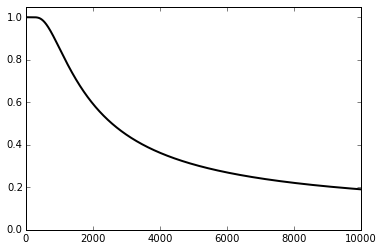

In [12]:
from pylab import *
%matplotlib inline

plot(M, pc, 'k', lw=2)
ylim([0, 1.05])